Ref: <https://github.com/codebasics/py/blob/master/ML/11_random_forest/11_random_forest.ipynb>

## Import Packages

In [41]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

## Load Data

In [42]:
df = pd.read_csv("D:/NF/ML/Multinomial Logistic Regression/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
# Drop the unrelated variable

df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
# Information of the data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
# Check the number of samples of each clas in Species

df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [46]:
# Check for missing values

df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# FOR EXPLORATORY DATA ANALYSIS REFER Multi_LR_iris

## Handling Outliers

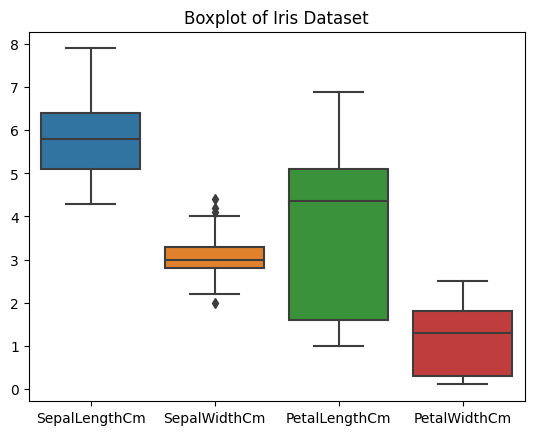

In [47]:
# Plot boxplot for each feature
sns.boxplot(data=df)
plt.title('Boxplot of Iris Dataset')
plt.show()

Old Shape:  (150, 5)
New Shape:  (150, 5)


C:\Users\farisha.krishnan\AppData\Local\Temp\ipykernel_22044\3418498316.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['SepalWidthCm'], 25,
C:\Users\farisha.krishnan\AppData\Local\Temp\ipykernel_22044\3418498316.py:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['SepalWidthCm'],75,


<Axes: xlabel='SepalWidthCm'>

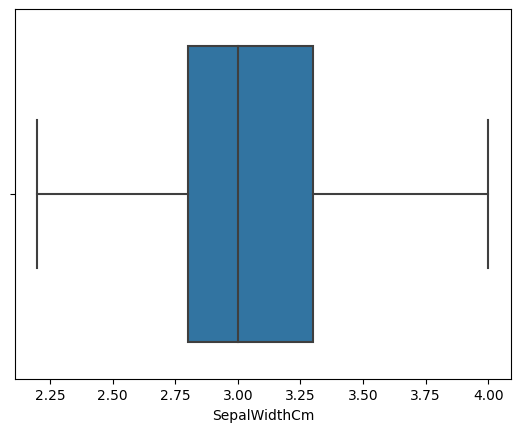

In [48]:
# handling the outliers
# Detect the outliers using IQR 

#IQR
Q1 = np.percentile(df['SepalWidthCm'], 25,
                   interpolation='midpoint')
Q3 = np.percentile(df['SepalWidthCm'],75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", df.shape)

#Upper bound
#upper=np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR))

#Lower bound
#lower=np.where((df['SepalWidthCm']) <= (Q1-1.5*IQR))

#Removing the outliers
#df.drop(upper[0], inplace = True)
#df.drop(lower[0], inplace = True)

# Define outlier boundaries
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identify outliers
outliers = (df['SepalWidthCm'] < lower_bound) | (df['SepalWidthCm'] > upper_bound)

# Replace outliers with the mean value of the 'SepalWidthCm' column
df.loc[outliers, 'SepalWidthCm'] = np.mean(df['SepalWidthCm'])

print("New Shape: ",df.shape)

sns.boxplot(x='SepalWidthCm', data=df)

## Build The Model

In [49]:
# The target need to convert to numeric format

le=LabelEncoder()
df['Species']= le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
# Separate for independent and dependent variables

X= df.drop(columns=['Species'])
y= df.Species

In [51]:
# Split data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

In [52]:
model = RandomForestClassifier(n_estimators=10, random_state=42)

In [53]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [54]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

## Model Evaluation

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [57]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [58]:
print("Accuracy: ", model.score(X_test, y_test) * 100)

Accuracy:  100.0


## Finding Important Features

In [69]:
# Prepare the meshgrid for each pair of features
feature_names = X.columns
class_names = np.unique(y)

In [70]:

feature_imp = pd.Series(model.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

PetalLengthCm    0.423313
PetalWidthCm     0.422337
SepalLengthCm    0.134377
SepalWidthCm     0.019972
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


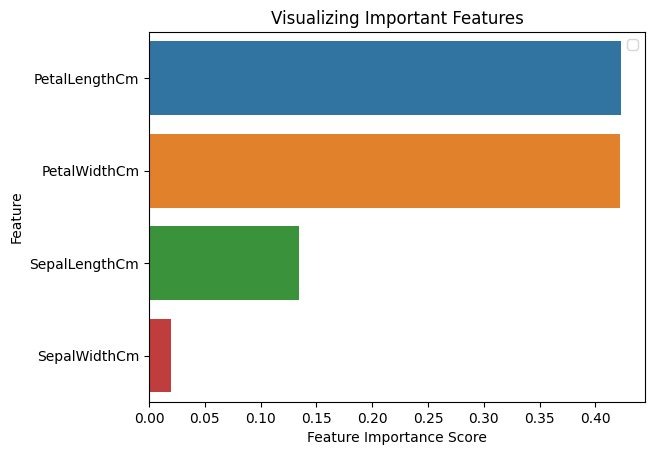

In [85]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Visualizing Important Features')
plt.legend()
plt.show()

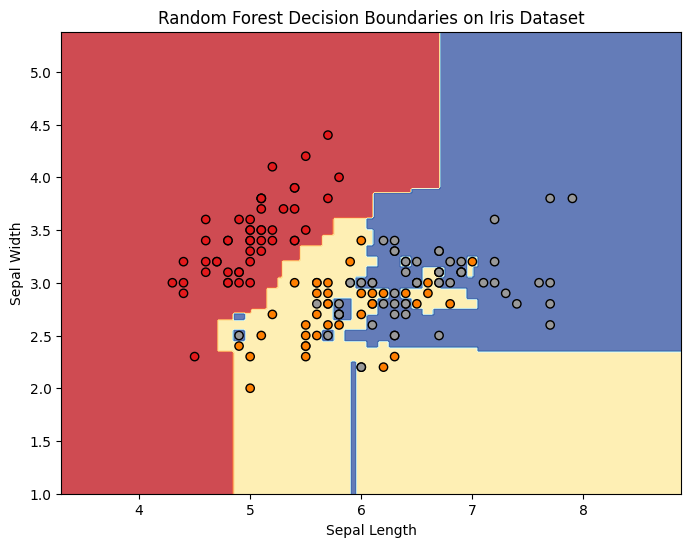

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Select the first two features (sepal length and sepal width)
y = iris.target

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

# Fit the model to the data
rf_model.fit(X, y)

# Generate a grid of points in the feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each grid point
Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Random Forest Decision Boundaries on Iris Dataset')
plt.show()
